# Sentiment Analysis

### Analysis based on data from main extraction and processing steps

### First we load in some Gaza-related news and filter it to BBC to see a general trend

In [56]:
#loading in the test data
import pandas as pd

df = pd.read_csv('sentiment_text_csv/gaza_transcripts.csv') # csv for video text df
df.head()


,Title,Date,Duration,URL,Source,In_April,text
0,Explosions in Iran as Israel vows retaliation ...,2024-04-19,0:00:57,https://www.youtube.com/watch?v=bQRYjWIDCkM,CNN,True,there's Breaking News Tonight reports that Isr...
1,"Israel carries out strike against Iran, US off...",2024-04-19,0:00:42,https://www.youtube.com/watch?v=CwJdNZ72M5U,CNN,True,I purchase moments ago from Us official confir...
2,House passes foreign aid for Ukraine and Israel,2024-04-20,0:00:58,https://www.youtube.com/watch?v=fee7eSNW58c,CNN,True,I miss both the Asia 311 and the Nazar 112 the...
3,Explosions over skies of Israel as barrage of ...,2024-04-14,0:07:44,https://www.youtube.com/watch?v=g1vAkZx2xDg,CNN,True,you were following major breaking news over th...
4,Dramatic video shows outgoing Hezbollah rocket...,2024-04-14,0:07:46,https://www.youtube.com/watch?v=lLBzubEayvo,CNN,True,is Israel scrambled big time to intercept an u...


In [ ]:
import string
from textblob import TextBlob

def preprocess_text_textblob(text):
    """
    Preprocess text for sentiment analysis with TextBlob
    
    Tokenization is handled internally to textblob and so not done here;
    lemmatization is also not done because the textblob model uses raw text tokens for training
    
    """
    # Lowercase for text uniformity
    text = text.lower()
    
    # Removing punctuation that does not contribute to sentiment
    # Keeping exclamation marks because they can intensify sentiment (eg. "great!" vs "great")
    punct_to_remove = string.punctuation.replace('!', '')  # excluding '!' from removal list
    translator = str.maketrans('', '', punct_to_remove)
    text = text.translate(translator)
    return text

def get_sentiment(text):
    """Calculate sentiment polarity and subjectivity after preprocessing text for TextBlob."""
    processed_text = preprocess_text_textblob(text)
    blob = TextBlob(processed_text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# First application

# Filter the DataFrame to remove any rows where 'text' is not a string (error handling)
df = df[df['text'].apply(lambda x: isinstance(x, str))]

# Apply sentiment analysis
df[['polarity', 'subjectivity']] = df['text'].apply(lambda x: pd.Series(get_sentiment(x)))

print(df)


In [24]:
# Filtering datasets to a given news source

import pandas as pd

def filter_source(df, source_name):
    """
    Filter df to include only rows where 'Source' column matches target string
    """
    filtered_df = df[df['Source'] == source_name]
    return filtered_df


BBC_Gaza = filter_source(df, 'BBC News')
print(BBC_Gaza)


                                                Title       Date Duration  \
37  Israel accused of deadly strike on Iranian con... 2024-04-01  0:09:08   
30  US 'outraged' by Israeli strike on World Centr... 2024-04-02  0:04:26   
39  Three British workers among those killed in Ga... 2024-04-02  0:09:25   
40  Israel minister denies Gaza aid convoy air str... 2024-04-04  0:05:50   
38  Israel-Gaza: UK arms sales to Israel should en... 2024-04-04  0:07:49   
34  Israel says it will open new aid routes into G... 2024-04-05  0:06:10   
24  Gaza evacuation warnings from IDF contain many... 2024-04-05  0:03:14   
17  McDonald's to buy back Israeli restaurants aft... 2024-04-05  0:00:59   
48  Israel military fires senior officers after ai... 2024-04-05  0:12:53   
46  Israelis and Palestinians mark six months of w... 2024-04-07  0:12:28   
35  Israel's military confirms 'decline in forces'... 2024-04-08  0:05:56   
32  Israel’s PM says date for offensive in Gaza's ... 2024-04-09  0:06:21   

## Here we look at sentiment related to Gaze from BBC by itself

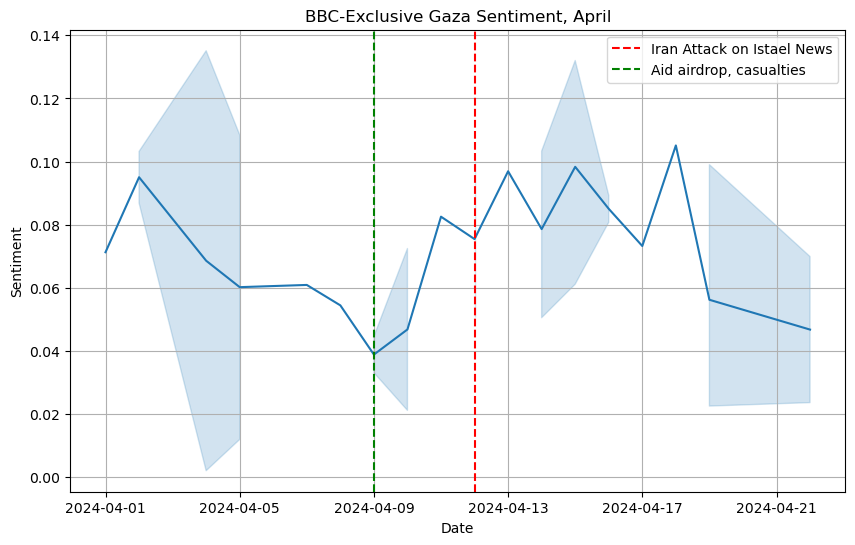

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

BBC_Gaza['Date'] = pd.to_datetime(BBC_df['Date'])
df = BBC_df.sort_values('Date')




plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Date', y='polarity', data=df)

plt.title('BBC-Exclusive Gaza Sentiment, April')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)

# Event of potential importance
event_date = pd.to_datetime('2024-04-12')
ax.axvline(x=event_date, color='red', linestyle='--', label='Iran Attack on Istael News')  # Red dashed line at April 13th

event_date = pd.to_datetime('2024-04-9')
ax.axvline(x=event_date, color='green', linestyle='--', label='Aid airdrop, casualties')

plt.legend()  # Show the legend with the label from axvline
plt.show()




### Next we look at BBC on Gaza versus BBC on all topics

In [26]:
BBC_all = pd.read_csv('sentiment_text_csv/all_videos.csv') 
BBC_all.head()


,Title,Date,Duration,URL,text
0,Moment maternity staff rush to keep babies saf...,2024-04-04,0:00:19,https://www.youtube.com/watch?v=0yT4GKoFLrU,NaN
1,A civilian was filmed confronting the Sydney k...,2024-04-13,0:00:24,https://www.youtube.com/watch?v=CgDKlYD2f7g,you could have kept that in the white T-shirt ...
2,Man nearly gets cut by runaway saw blade in Eu...,2024-03-31,0:00:25,https://www.youtube.com/watch?v=DXvx2g1Y_YM,NaN
3,Skydivers witness total solar eclipse mid-air....,2024-04-11,0:00:28,https://www.youtube.com/watch?v=87IJ1eY2su4,NaN
4,Marvel star Jonathan Majors sentenced to proba...,2024-04-09,0:00:52,https://www.youtube.com/watch?v=q2sDTo-VJpw,the back to drop by Marvel to the four majors ...


In [28]:
import pandas as pd

def preprocess_and_analyze(df):
    """
    Process the DataFrame by filtering non-string 'text' entries and applying sentiment analysis
    """
    # Filter the DataFrame to keep only rows where 'text' is a string
    df = df[df['text'].apply(lambda x: isinstance(x, str))]

    # Apply sentiment analysis and expand the results into two columns
    df[['polarity', 'subjectivity']] = df['text'].apply(
        lambda x: pd.Series(get_sentiment(x))
    )

    return df


BBC_all = preprocess_and_analyze(BBC_all)
BBC_all.head()



,Title,Date,Duration,URL,text,polarity,subjectivity
1,A civilian was filmed confronting the Sydney k...,2024-04-13,0:00:24,https://www.youtube.com/watch?v=CgDKlYD2f7g,you could have kept that in the white T-shirt ...,0.210417,0.385417
4,Marvel star Jonathan Majors sentenced to proba...,2024-04-09,0:00:52,https://www.youtube.com/watch?v=q2sDTo-VJpw,the back to drop by Marvel to the four majors ...,-0.068528,0.312208
5,Audio captures Baltimore dispatchers' response...,2024-03-28,0:00:32,https://www.youtube.com/watch?v=KPdz3rSBTOI,what are you guys on the Southside when you gu...,-0.051852,0.429630
6,First product of Meghan's lifestyle brand reve...,2024-04-17,0:00:41,https://www.youtube.com/watch?v=SmjvrMQ6AXc,The Duchess of Sussex is hoping for some sweet...,0.139394,0.459091
9,Paralympian urges Nike to sell single shoes. #...,2024-04-12,0:00:53,https://www.youtube.com/watch?v=OVGCYZbvLFg,I don't understand why I'm having to pay for a...,0.155758,0.515303


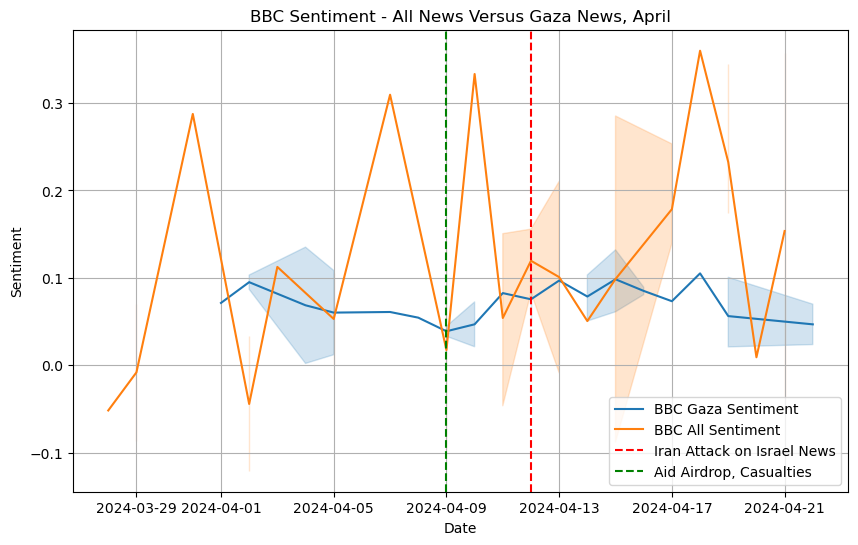

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ensuring data-time format for graphing 
BBC_Gaza['Date'] = pd.to_datetime(BBC_Gaza['Date'])
BBC_all['Date'] = pd.to_datetime(BBC_all['Date'])

# Sort by date
BBC_Gaza_sorted = BBC_Gaza.sort_values('Date')
BBC_all_sorted = BBC_all.sort_values('Date')


plt.figure(figsize=(10, 6))

# Plot lines
ax = sns.lineplot(x='Date', y='polarity', data=BBC_Gaza_sorted, label='BBC Gaza Sentiment')
sns.lineplot(x='Date', y='polarity', data=BBC_all_sorted, label='BBC All Sentiment', ax=ax)

# title and labels
plt.title('BBC Sentiment - All News Versus Gaza News, April')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)

# Highlighting specific events with vertical lines
event_date = pd.to_datetime('2024-04-12')
ax.axvline(x=event_date, color='red', linestyle='--', label='Iran Attack on Israel News')

event_date = pd.to_datetime('2024-04-9')
ax.axvline(x=event_date, color='green', linestyle='--', label='Aid Airdrop, Casualties')

# Display the legend to show labels for both sentiment lines and events
plt.legend()
plt.show()


### In order to understand some of the volatility, we look at some other topics too

In [43]:
BBC_China = pd.read_csv('sentiment_text_csv/china.csv')
BBC_Trump = pd.read_csv('sentiment_text_csv/trump.csv')

In [45]:
BBC_China = preprocess_and_analyze(BBC_China)
BBC_Trump = preprocess_and_analyze(BBC_Trump)

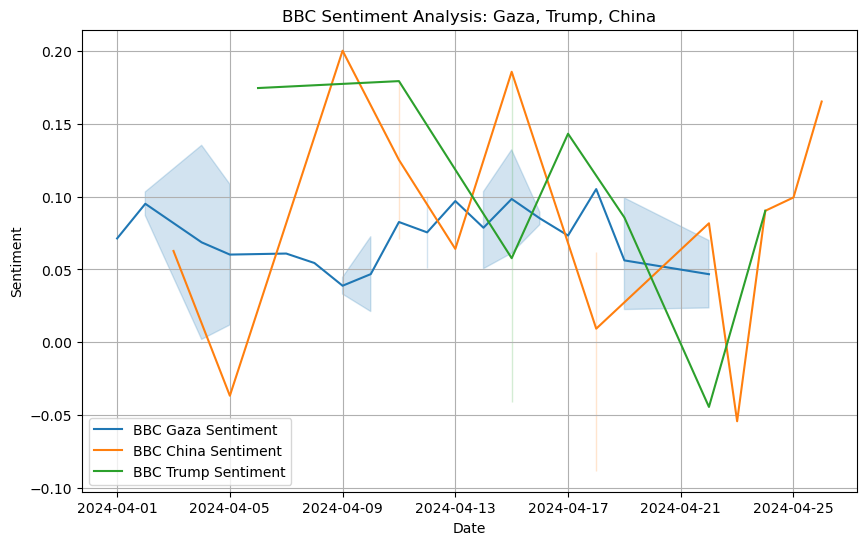

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime format for all relevant DataFrames
BBC_Gaza['Date'] = pd.to_datetime(BBC_Gaza['Date'])
BBC_China['Date'] = pd.to_datetime(BBC_China['Date'])
BBC_Trump['Date'] = pd.to_datetime(BBC_Trump['Date'])

# Sort all DataFrames by 'Date'
BBC_Gaza_sorted = BBC_Gaza.sort_values('Date')
BBC_China_sorted = BBC_China.sort_values('Date')
BBC_Trump_sorted = BBC_Trump.sort_values('Date')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each DataFrame
ax = sns.lineplot(x='Date', y='polarity', data=BBC_Gaza_sorted, label='BBC Gaza Sentiment')
sns.lineplot(x='Date', y='polarity', data=BBC_China_sorted, label='BBC China Sentiment', ax=ax)
sns.lineplot(x='Date', y='polarity', data=BBC_Trump_sorted, label='BBC Trump Sentiment', ax=ax)

# Adding title and labels
plt.title('BBC Sentiment Analysis: Gaza, Trump, China')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)

# Display the legend to show labels for both sentiment lines and events
plt.legend()
plt.show()


### Finally, we look at a different news source (Al Jazeera) to see if there is a big difference in est. sentiment

In [52]:
AlJazeera_Gaza = pd.read_csv('sentiment_text_csv/Al_Jazeera_gaza.csv')

In [54]:
AlJazeera_Gaza = preprocess_and_analyze(AlJazeera_Gaza)

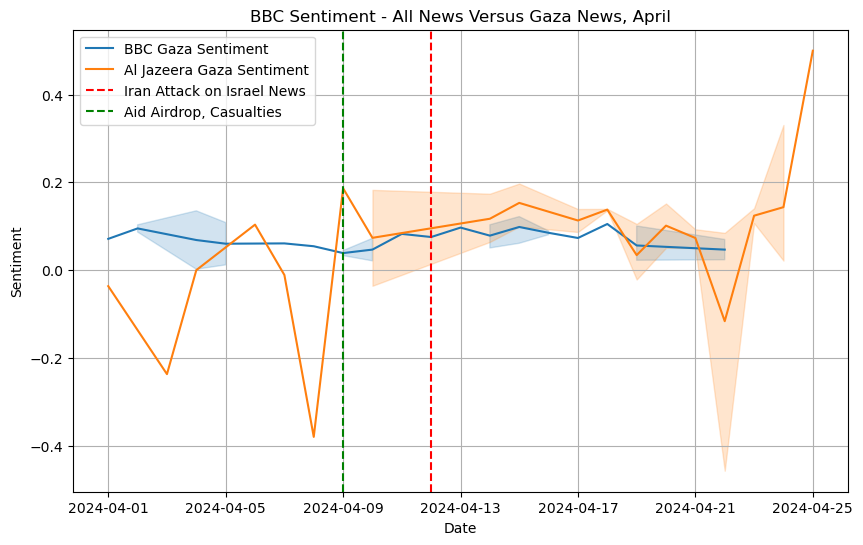

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ensuring data-time format for graphing 
BBC_Gaza['Date'] = pd.to_datetime(BBC_Gaza['Date'])
AlJazeera_Gaza['Date'] = pd.to_datetime(AlJazeera_Gaza['Date'])

# Sort
BBC_Gaza_sorted = BBC_Gaza.sort_values('Date')
AlJazeera_Gaza_sorted = AlJazeera_Gaza.sort_values('Date')


plt.figure(figsize=(10, 6))

# Plot lines
ax = sns.lineplot(x='Date', y='polarity', data=BBC_Gaza_sorted, label='BBC Gaza Sentiment')
sns.lineplot(x='Date', y='polarity', data=AlJazeera_Gaza_sorted, label='Al Jazeera Gaza Sentiment', ax=ax)

# title and labels
plt.title('BBC Sentiment - All News Versus Gaza News, April')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.grid(True)

# Highlighting specific events with vertical lines
event_date = pd.to_datetime('2024-04-12')
ax.axvline(x=event_date, color='red', linestyle='--', label='Iran Attack on Israel News')

event_date = pd.to_datetime('2024-04-9')
ax.axvline(x=event_date, color='green', linestyle='--', label='Aid Airdrop, Casualties')

# Display the legend to show labels for both sentiment lines and events
plt.legend()
plt.show()